# Aplicando NLTK em uma base de dados real

* Usaremos uma base de dados real de tweets sobre o governo de Minas Gerais
* O twitter é um serviço muito utilizado por empresas para análises
* Trabalhar com o idioma portugues ainda é um desafio

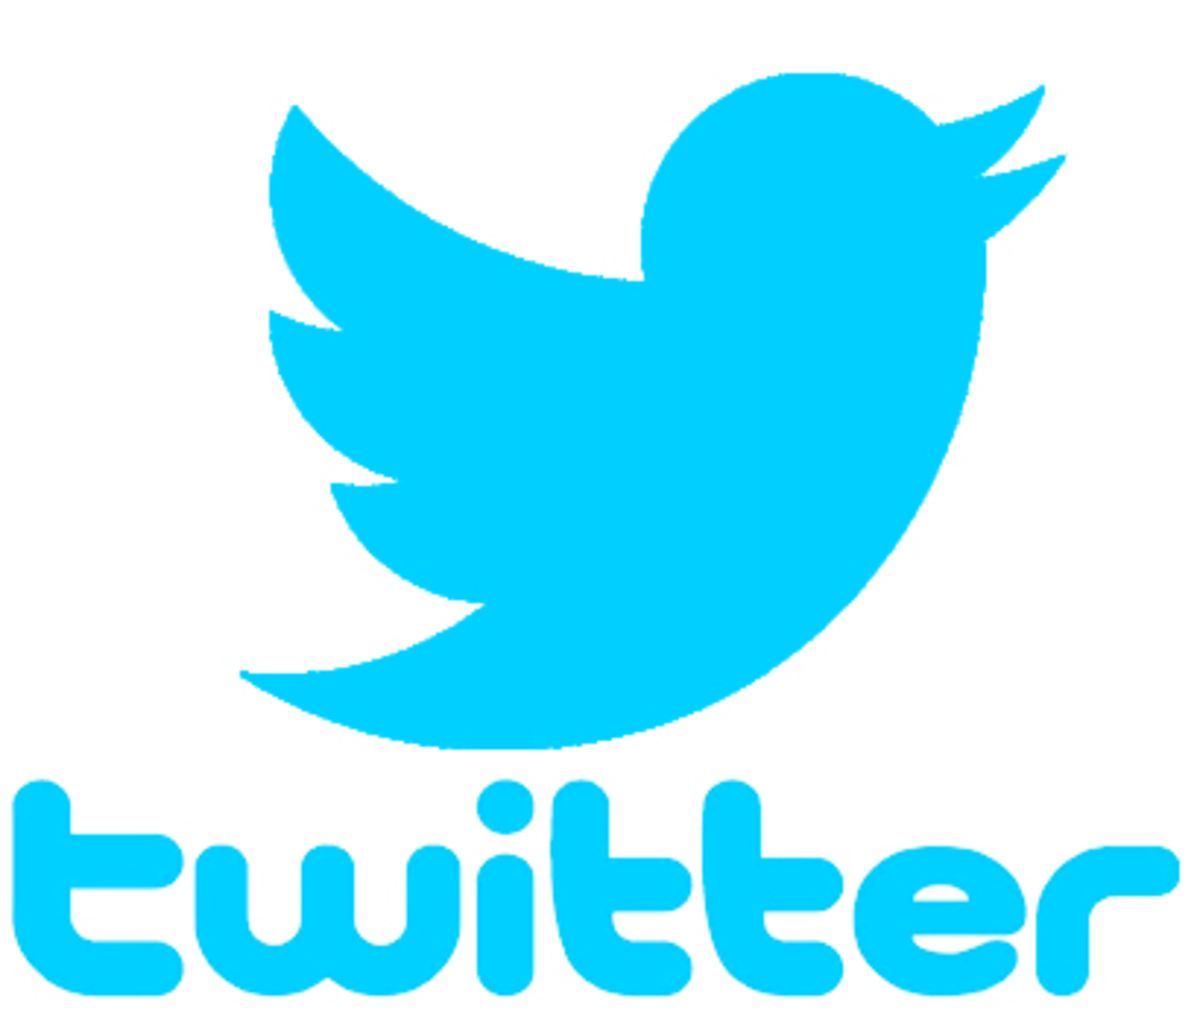

**Ler a base de dados**

In [ ]:
import pandas as pd

In [ ]:
tweets = pd.read_csv('Tweets_Mg.csv')

In [ ]:
tweets.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets.Text.head(20)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

In [ ]:
tweets.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

**Tokenization dos tweets**

* Tokenização é a capacidade de reconhecer palavras e sentenças em uma frase ou texto.
* Existem diversos tipos de tokenizadores.
* Conheça o domínio na qual voce está trabalhando.

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize("RT @rodrigofs10 I like very Loooooot this movieee!!, thanks ;) :) :-)")

['RT',
 '@',
 'rodrigofs10',
 'I',
 'like',
 'very',
 'Loooooot',
 'this',
 'movieee',
 '!',
 '!',
 ',',
 'thanks',
 ';',
 ')',
 ':',
 ')',
 ':',
 '-',
 ')']

In [ ]:
# Biblioteca especifica para coletar dados twitter
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet_tokenize = TweetTokenizer()

In [ ]:
tweet_tokenize.tokenize("RT @rodrigofs10 I like very Loooooot this movieee!!, thanks ;) :) :-)")

['RT',
 '@rodrigofs10',
 'I',
 'like',
 'very',
 'Loooooot',
 'this',
 'movieee',
 '!',
 '!',
 ',',
 'thanks',
 ';)',
 ':)',
 ':-)']

In [ ]:
# Itero sobre os tweets e imprimo os tokens que meu twitter identificou
tweet_tokenize = TweetTokenizer()
for t in tweets.Text.head(50).items():
    print ("Tweet:", t[1])
    print ("Tokens:", tweet_tokenize.tokenize(t[1]))

Tweet: ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ
Tokens: ['�', '�', '�', '⛪', '@', 'Catedral', 'de', 'Santo', 'Antônio', '-', 'Governador', 'Valadares', '/', 'MG', 'https://t.co/JSbKamIqUJ']
Tweet: � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf
Tokens: ['�', '@', 'Governador', 'Valadares', ',', 'Minas', 'Gerais', 'https://t.co/B3ThIDJCSf']
Tweet: �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw
Tokens: ['�', '�', '@', 'Governador', 'Valadares', ',', 'Minas', 'Gerais', 'https://t.co/dPkgzVR2Qw']
Tweet: ��� https://t.co/BnDsO34qK0
Tokens: ['�', '�', '�', 'https://t.co/BnDsO34qK0']
Tweet: ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
Tokens: ['�', '�', '�', 'PSOL', 'vai', 'questionar', 'aumento', 'de', 'vereadores', 'e', 'prefeito', 'de', 'BH', 'na', 'Justiça', '-', 'Politica', '-', 'Estado', 'de', 'Minas', 'https://t.co/DMg7BGsek5']
Twee

* Gera uma lista de palavras a partir dos tokens ou termos da base de dados.

In [ ]:
from functools import reduce
import operator

list_palavras = []

# Vai iterar sobre todos os tweets e atribuo cada palavra da frase, como uma palavra separada.
for t in tweets.Text.items():
    list_palavras.append(t[1].split())

# Reduz a lista de listas em apenas uma lista única de elementos.
list_palavras = reduce(operator.concat, list_palavras)
list_palavras[:50]

['���⛪',
 '@',
 'Catedral',
 'de',
 'Santo',
 'Antônio',
 '-',
 'Governador',
 'Valadares/MG',
 'https://t.co/JSbKamIqUJ',
 '�',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/B3ThIDJCSf',
 '��',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/dPkgzVR2Qw',
 '���',
 'https://t.co/BnDsO34qK0',
 '���',
 'PSOL',
 'vai',
 'questionar',
 'aumento',
 'de',
 'vereadores',
 'e',
 'prefeito',
 'de',
 'BH',
 'na',
 'Justiça',
 '-',
 'Politica',
 '-',
 'Estado',
 'de',
 'Minas',
 'https://t.co/DMg7BGsek5',
 '"',
 'bom',
 'é',
 'bandido']

In [ ]:
len(list_palavras)

132341

**Gera um objeto do tipo *nltk.Text* a partir da lista de palavras.**

In [ ]:
tweets_text_nltk = nltk.Text(list_palavras)

**Imprime tokens**

In [ ]:
# Termos ou palavras na lista
tweets_text_nltk.tokens

['���⛪',
 '@',
 'Catedral',
 'de',
 'Santo',
 'Antônio',
 '-',
 'Governador',
 'Valadares/MG',
 'https://t.co/JSbKamIqUJ',
 '�',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/B3ThIDJCSf',
 '��',
 '@',
 'Governador',
 'Valadares,',
 'Minas',
 'Gerais',
 'https://t.co/dPkgzVR2Qw',
 '���',
 'https://t.co/BnDsO34qK0',
 '���',
 'PSOL',
 'vai',
 'questionar',
 'aumento',
 'de',
 'vereadores',
 'e',
 'prefeito',
 'de',
 'BH',
 'na',
 'Justiça',
 '-',
 'Politica',
 '-',
 'Estado',
 'de',
 'Minas',
 'https://t.co/DMg7BGsek5',
 '"',
 'bom',
 'é',
 'bandido',
 'morto"',
 'Deputado',
 'Cabo',
 'Júlio',
 'é',
 'condenado',
 'e',
 'fica',
 'inelegível',
 'por',
 '10',
 'anos',
 '-',
 'Politica',
 '-',
 'Estado',
 'de',
 'Minas',
 'https://t.co/3GfAqvrFHS',
 '"..E',
 '25%',
 'dos',
 'mineiros',
 'dizem',
 'não',
 'torcer',
 'para',
 'time',
 'nenhum,mesmo',
 'dentro',
 'de',
 'um',
 'estado',
 'com',
 'Atlético-MG',
 'e',
 'Cruzeiro.',
 'Pq?.."',
 'https://t.co/fN5evlLQsR',


In [ ]:
len(list_palavras)

132341

**Encontrando a frequencia do token 'Minas' e 'Pimental'**

In [ ]:
tweets_text_nltk.count('Minas')

2626

In [ ]:
tweets_text_nltk.count('Pimentel')

418

In [ ]:
#Verificar o percentual que a palavra aparece na base de dados
def palavra_percentual(freq, dataset):
  total = len(dataset)
  return 100*freq/total

In [ ]:
palavra_percentual(list_palavras.count('Minas'), list_palavras)

1.9842679139495696

In [ ]:
palavra_percentual(list_palavras.count('Pimentel'), list_palavras)

0.3158507189759787

**Similaridade de palavras por contextos**

In [ ]:
tweets_text_nltk.similar('Minas')

mg rt drogas roubo estado o fora bh pimentel anos que governo sp
manaus um calamidade casos segurança temer presídio


In [ ]:
tweets_text_nltk.similar('Gerais')

rt que politica e para economia governador é não do no mantém melhor
deste de com governo tem q o


In [ ]:
tweets_text_nltk.similar('Pimentel')

minas rt governador estado mg o que fora drogas e anos mas calamidade
né resolver ensino gerais é com em


In [ ]:
tweets.Text.values[0]

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ'

**Conjuntos de Palavras empregadas similarmente**

In [ ]:
tweets_text_nltk.collocations()

dois helicópteros; febre amarela; Minas Gerais; calamidade
financeira,; compra mais; helicópteros!!A cara; @AnaPaulaVolei: Mais;
estado. htt…; avisa Justiça; calamidade financeira; canalhice ainda;
mais dois; são maiores; tem recursos; três anos,; Com três; conta
judicial; anos, presídio; presídio privado; 21,8 milhões:


In [ ]:
# Obtem a frequencia de cada palavra
fdist = nltk.FreqDist(p.lower() for p in list_palavras)

In [ ]:
fdist.most_common(20)

[('de', 8624),
 ('em', 4478),
 ('rt', 3080),
 ('minas', 2945),
 ('e', 2269),
 ('estado', 2120),
 ('mg', 2004),
 ('-', 1937),
 ('a', 1889),
 ('governo', 1775),
 ('o', 1737),
 ('do', 1477),
 ('é', 1289),
 ('que', 1230),
 ('mais', 1157),
 ('gerais', 980),
 ('drogas', 917),
 ('com', 913),
 ('compra', 886),
 ('calamidade', 882)]

**Removendo Stopwords**

In [ ]:
# Define a lista de Stopwords
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

In [ ]:
# lista de stopwords
stopwords

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


**Remove stopwords da lista de palavras**

In [ ]:
list_palavras = [i.lower() for i in list_palavras if not i.lower() in stopwords]

print (list_palavras[:50])

['���⛪', '@', 'catedral', 'santo', 'antônio', '-', 'governador', 'valadares/mg', 'https://t.co/jsbkamiquj', '�', '@', 'governador', 'valadares,', 'minas', 'gerais', 'https://t.co/b3thidjcsf', '��', '@', 'governador', 'valadares,', 'minas', 'gerais', 'https://t.co/dpkgzvr2qw', '���', 'https://t.co/bndso34qk0', '���', 'psol', 'vai', 'questionar', 'aumento', 'vereadores', 'prefeito', 'bh', 'justiça', '-', 'politica', '-', 'estado', 'minas', 'https://t.co/dmg7bgsek5', '"', 'bom', 'bandido', 'morto"', 'deputado', 'cabo', 'júlio', 'condenado', 'fica', 'inelegível']


In [ ]:
len(list_palavras)

97023

In [ ]:
# Obtem a frequencia de cada palavra
fdist = nltk.FreqDist(p.lower() for p in list_palavras)

In [ ]:
fdist.most_common(20)

[('rt', 3080),
 ('minas', 2945),
 ('estado', 2120),
 ('mg', 2004),
 ('-', 1937),
 ('governo', 1775),
 ('gerais', 980),
 ('drogas', 917),
 ('compra', 886),
 ('calamidade', 882),
 ('dois', 879),
 ('helicópteros', 804),
 ('q', 672),
 ('governador', 651),
 ('presídio', 568),
 ('febre', 549),
 ('r$', 519),
 ('amarela', 506),
 ('pimentel', 465),
 ('ainda', 461)]

    Verifamos que retiramos termos que nao seriam uteis para nossa analise, como:
    a, e, ou, -, etc. Ainda é possivel aprimorar ainda mais.

# **Trabalhando com Bigrams e Trigrams**

* **n-grams** é uma sequencia continua de n itens para uma amostra de texto ou fala.
* **Unigram** palavras únicas

* **Bigrams** são pares de palavras.
* **Trigrams** são trio de palavras.
* **Palavas** juntas são também conhecidas como **Colocações**

* Unigramns normalmente **não contém** muita informação quando se comparado com bigramns e trigrams.
* Quanto mais palavras mais **contexto** sobre a estrutura da linguagem.
* Você deve avaliar o uso de n-gramns levando isso em consideração no seu projeto.

In [ ]:
import nltk
from nltk import bigrams, trigrams

**Visualizando trigramns**

In [ ]:
list(bigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

[('O rato', 'roeu'),
 ('roeu', 'roupa'),
 ('roupa', 'do rei'),
 ('do rei', 'de roma')]

**Visualizando trigramns**

In [ ]:
list(trigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

[('O rato', 'roeu', 'roupa'),
 ('roeu', 'roupa', 'do rei'),
 ('roupa', 'do rei', 'de roma')]

**Imprimindo bigramns com a base de tweets**

In [ ]:
print (list(nltk.bigrams(list_palavras)))

[('���⛪', '@'), ('@', 'catedral'), ('catedral', 'santo'), ('santo', 'antônio'), ('antônio', '-'), ('-', 'governador'), ('governador', 'valadares/mg'), ('valadares/mg', 'https://t.co/jsbkamiquj'), ('https://t.co/jsbkamiquj', '�'), ('�', '@'), ('@', 'governador'), ('governador', 'valadares,'), ('valadares,', 'minas'), ('minas', 'gerais'), ('gerais', 'https://t.co/b3thidjcsf'), ('https://t.co/b3thidjcsf', '��'), ('��', '@'), ('@', 'governador'), ('governador', 'valadares,'), ('valadares,', 'minas'), ('minas', 'gerais'), ('gerais', 'https://t.co/dpkgzvr2qw'), ('https://t.co/dpkgzvr2qw', '���'), ('���', 'https://t.co/bndso34qk0'), ('https://t.co/bndso34qk0', '���'), ('���', 'psol'), ('psol', 'vai'), ('vai', 'questionar'), ('questionar', 'aumento'), ('aumento', 'vereadores'), ('vereadores', 'prefeito'), ('prefeito', 'bh'), ('bh', 'justiça'), ('justiça', '-'), ('-', 'politica'), ('politica', '-'), ('-', 'estado'), ('estado', 'minas'), ('minas', 'https://t.co/dmg7bgsek5'), ('https://t.co/dmg7b

**texto em itálico Imprimindo trigramns com a base de tweets**

In [ ]:
print (list(nltk.trigrams(list_palavras[:100])))

[('���⛪', '@', 'catedral'), ('@', 'catedral', 'santo'), ('catedral', 'santo', 'antônio'), ('santo', 'antônio', '-'), ('antônio', '-', 'governador'), ('-', 'governador', 'valadares/mg'), ('governador', 'valadares/mg', 'https://t.co/jsbkamiquj'), ('valadares/mg', 'https://t.co/jsbkamiquj', '�'), ('https://t.co/jsbkamiquj', '�', '@'), ('�', '@', 'governador'), ('@', 'governador', 'valadares,'), ('governador', 'valadares,', 'minas'), ('valadares,', 'minas', 'gerais'), ('minas', 'gerais', 'https://t.co/b3thidjcsf'), ('gerais', 'https://t.co/b3thidjcsf', '��'), ('https://t.co/b3thidjcsf', '��', '@'), ('��', '@', 'governador'), ('@', 'governador', 'valadares,'), ('governador', 'valadares,', 'minas'), ('valadares,', 'minas', 'gerais'), ('minas', 'gerais', 'https://t.co/dpkgzvr2qw'), ('gerais', 'https://t.co/dpkgzvr2qw', '���'), ('https://t.co/dpkgzvr2qw', '���', 'https://t.co/bndso34qk0'), ('���', 'https://t.co/bndso34qk0', '���'), ('https://t.co/bndso34qk0', '���', 'psol'), ('���', 'psol', 'v